### Credit Card Default Prediction

Delinquent in general is a slightly mild term where a borrower is not repaying charges and is behind by certain months whereas Default is a term where a borrower has not been able to pay charges and is behind for a long period of months and is unlikely to repay the charges.

This case study is about identifying the borrowers who are likely to default in the next two years with serious delinquency of having delinquent more than 3 months.

##### Objective
Building a model using the inputs/attributes which are general profile and historical records of a borrower to predict whether one is likely to have serious delinquency in the next 2 years

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Display all rows and columns of a dataframe 
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Load Data

In [2]:
df = pd.read_csv('Data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Exploratory Data Analysis

In [3]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
# Check datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [19]:
round(df.isnull().mean()*100, 2)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64

In [6]:
# Check shape
df.shape

(150000, 12)

In [20]:
# Rename 'Unnamed: 0' column
df.rename(columns={'Unnamed: 0': 'CustomerID'}, inplace=True)

In [22]:
# Get descriptive stastistics
describe = df.describe()
describe.T.style.background_gradient(cmap='viridis', low=0.2, high=0.1)

,count,mean,std,min,25%,50%,75%,max
CustomerID,150000.000000,75000.500000,43301.414527,1.000000,37500.750000,75000.500000,112500.250000,150000.000000
SeriousDlqin2yrs,150000.000000,0.066840,0.249746,0.000000,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,150000.000000,6.048438,249.755371,0.000000,0.029867,0.154181,0.559046,50708.000000
age,150000.000000,52.295207,14.771866,0.000000,41.000000,52.000000,63.000000,109.000000
NumberOfTime30-59DaysPastDueNotWorse,150000.000000,0.421033,4.192781,0.000000,0.000000,0.000000,0.000000,98.000000
DebtRatio,150000.000000,353.005076,2037.818523,0.000000,0.175074,0.366508,0.868254,329664.000000
MonthlyIncome,120269.000000,6670.221237,14384.674215,0.000000,3400.000000,5400.000000,8249.000000,3008750.000000
NumberOfOpenCreditLinesAndLoans,150000.000000,8.452760,5.145951,0.000000,5.000000,8.000000,11.000000,58.000000
NumberOfTimes90DaysLate,150000.000000,0.265973,4.169304,0.000000,0.000000,0.000000,0.000000,98.000000
NumberRealEstateLoansOrLines,150000.000000,1.018240,1.129771,0.000000,0.000000,1.000000,2.000000,54.000000


Text(0.5, 1.0, 'SeriousDlqin2yrs')

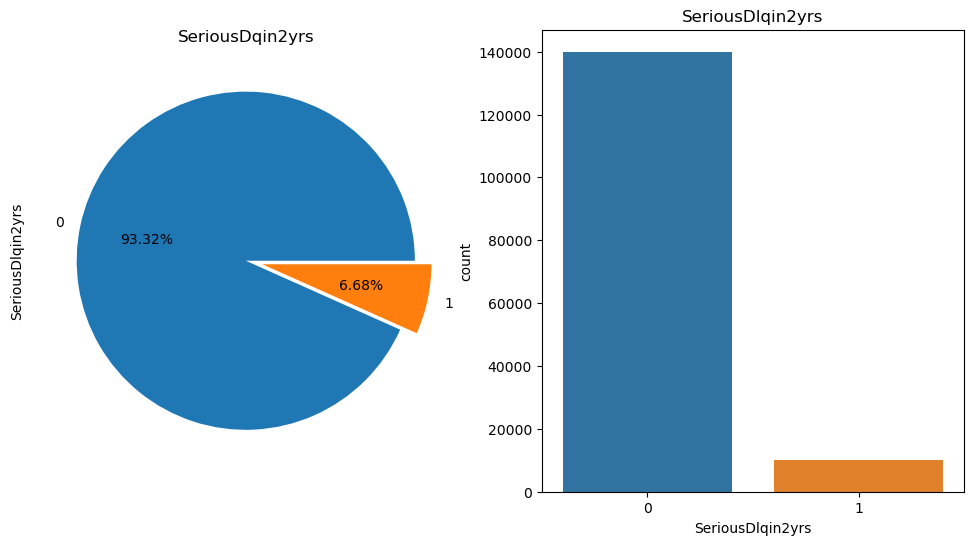

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.2f%%', ax=ax[0])
ax[0].set_title('SeriousDqin2yrs')
sns.countplot(x='SeriousDlqin2yrs', data=df, ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')

In [29]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [30]:
print(f"{(df['SeriousDlqin2yrs'].sum()/len(df))*100:.3}% of borrowers are seriously deliqeunt")

6.68% of borrowers are seriously deliqeunt


#### Data Preprocessing

#### Model Training and Experimentation

#### Hyperparameter Tuning

#### Model Interpretation